In [2]:
import matplotlib.pyplot as plt

In [9]:
def print_tsp_sample(file_path, num_lines=10):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            print(line.strip())

file_path = 'zi929.tsp'
print_tsp_sample(file_path, num_lines=10)        

NAME : zi929
COMMENT : 929 locations in Zimbabwe
COMMENT : Derived from National Imagery and Mapping Agency data
TYPE : TSP
DIMENSION : 929
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 15700.0000 30316.6667
2 16033.3333 28850.0000
3 16200.0000 31583.3333


In [6]:
def read_tsp_file(file_path):
    nodes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False
        for line in lines:
            if "NODE_COORD_SECTION" in line:
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.strip().split()
                node_id, x, y = int(parts[0]), float(parts[1]), float(parts[2])
                nodes.append((x, y))
    return nodes

In [7]:
def plot_tsp(nodes, show_path=False):
    x_coords, y_coords = zip(*nodes)
    plt.scatter(x_coords, y_coords, color='blue', label='Cities')
    
    if show_path:
        # Connect points in the order they appear
        plt.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=0.5)
    
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("TSP Tour Visualization")
    plt.legend()
    plt.show()

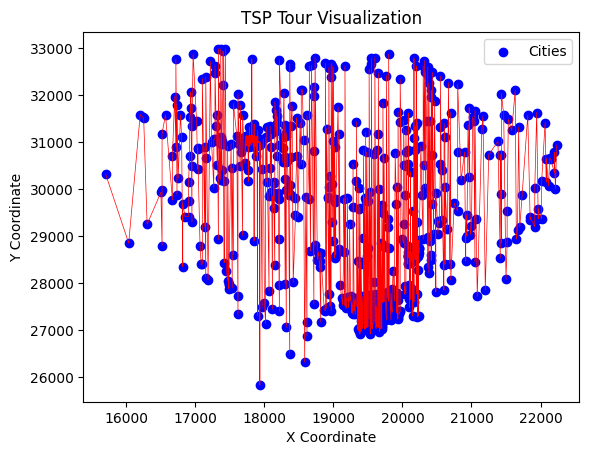

In [8]:
file_path = 'zi929.tsp'
nodes = read_tsp_file(file_path)
plot_tsp(nodes, show_path=True)